# **EDA Using Univariate Analysis**
Exploratory Data Analysis (EDA) using univariate analysis focuses on examining individual variables in your dataset to gain insights into their distribution, characteristics, and potential outliers. Univariate analysis helps you understand the basic properties of each variable and identify patterns that can guide further analysis.

## **Import Required Libraries**

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Read the Data**

#### **Dataset Description**
The Titanic dataset is a well-known and frequently used dataset in the field of machine learning. It contains information about passengers who were on board the RMS Titanic during its ill-fated maiden voyage, which tragically ended in a sinking on April 15, 1912. This dataset is often employed for practicing and demonstrating various machine learning techniques, particularly in the context of binary classification.

The dataset typically includes the following features:

1. **PassengerID:** A unique identifier for each passenger.
2. **Survived:** A binary variable indicating whether the passenger survived the sinking (1) or did not survive (0).
3. **Pclass (Ticket Class):** The socio-economic class of the passenger, with values 1, 2, or 3.
4. **Name:** The name of the passenger.
5. **Sex:** The gender of the passenger.
6. **Age:** The age of the passenger. This feature may contain missing values.
7. **SibSp:** The number of siblings/spouses aboard the Titanic.
8. **Parch:** The number of parents/children aboard the Titanic.
9. **Ticket:** The ticket number.
10. **Fare:** The amount of money paid for the ticket.
11. **Cabin:** The cabin number where the passenger stayed. This feature may contain missing values.
12. **Embarked:** The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The main objective when working with the Titanic dataset in a machine learning context is often to predict whether a passenger survived or not based on the given features. This is a binary classification problem. Machine learning algorithms can be trained on a subset of the data to learn patterns and relationships between the features and the target variable (Survived), and then these models can be evaluated on unseen data to assess their predictive performance.

It's important to note that the dataset might require preprocessing, such as handling missing values, encoding categorical variables, and scaling numerical features, to prepare it for machine learning models. The Titanic dataset serves as a valuable resource for beginners to practice and showcase their machine learning skills.

In [7]:
# Read the data into a dataframe
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Print the shape of the data
df.shape

(891, 12)

In [9]:
# Check the information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **EDA on Categorical Data**
Exploratory Data Analysis (EDA) on categorical data involves analyzing and visualizing the patterns, relationships, and distributions within categorical variables. Here are some common techniques and tools used for EDA on categorical data:

### **Count Plot**

A count plot is a type of categorical data visualization that displays the counts of observations in each category of a categorical variable. It is particularly useful for understanding the distribution and frequency of different categories within a dataset.

male      577
female    314
Name: Sex, dtype: int64

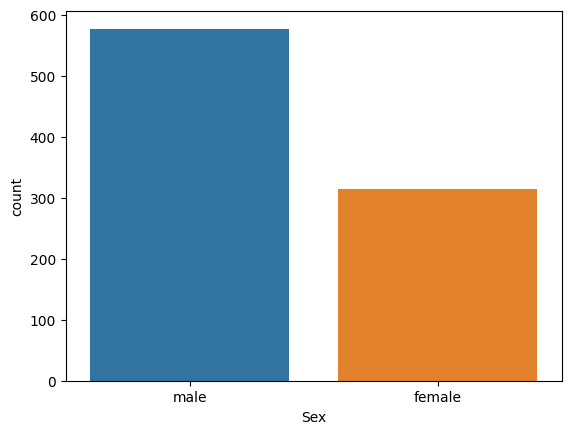

In [15]:
# Check the number of male and female in the 'Sex' column
sns.countplot(x=df["Sex"])
df["Sex"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

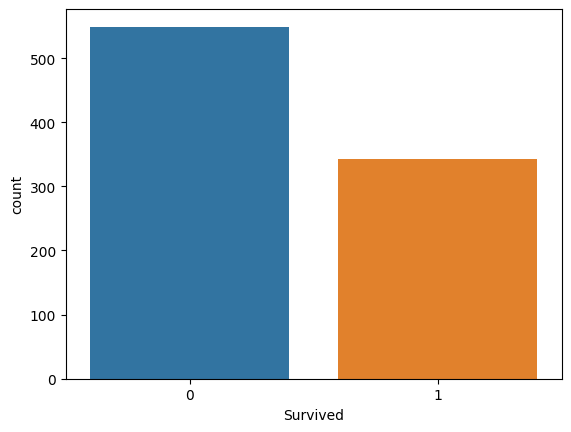

In [16]:
# Check the number of people died and survived
sns.countplot(x=df["Survived"])
df["Survived"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

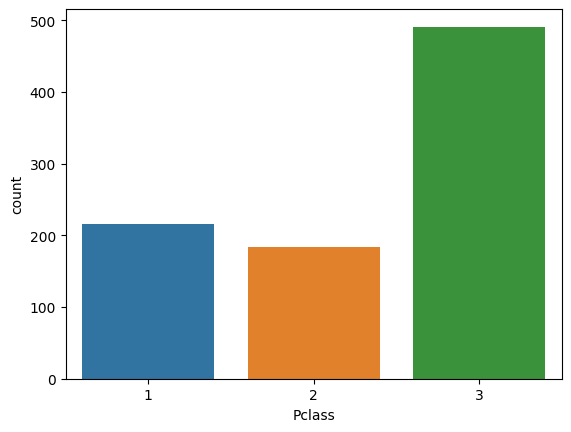

In [17]:
# Check the number of people boared at each class
sns.countplot(x=df["Pclass"])
df["Pclass"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

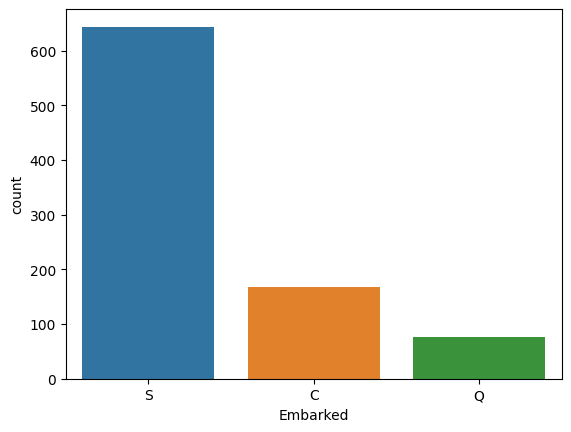

In [18]:
# Check the travellers embarked location
sns.countplot(x=df["Embarked"])
df["Embarked"].value_counts()

### **Pie Chart**
A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions. It is a popular visualization tool for representing the distribution of a categorical variable as a whole. Each slice of the pie represents a specific category, and the size of each slice corresponds to the proportion or percentage of the whole that the category represents.

0    61.616162
1    38.383838
Name: Survived, dtype: float64

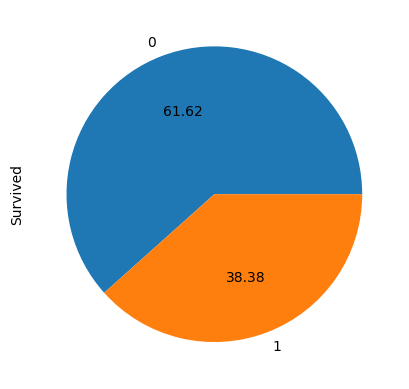

In [37]:
# Plot the percent of people died and survived in a pie chart
df["Survived"].value_counts().plot(kind="pie", autopct="%.2f")

# Calculate the percentage
(df["Survived"].value_counts()/len(df["Survived"])) * 100

## **EDA on Numerical Data**

Exploratory Data Analysis (EDA) on numerical data involves analyzing and visualizing the patterns, distributions, and relationships within quantitative variables. Here are some common techniques and tools used for EDA on numerical data:

### **Histogram**
Create histograms to visualize the distribution of numerical variables. Histograms display the frequency or probability density of different ranges or bins.

<Axes: xlabel='Age', ylabel='Count'>

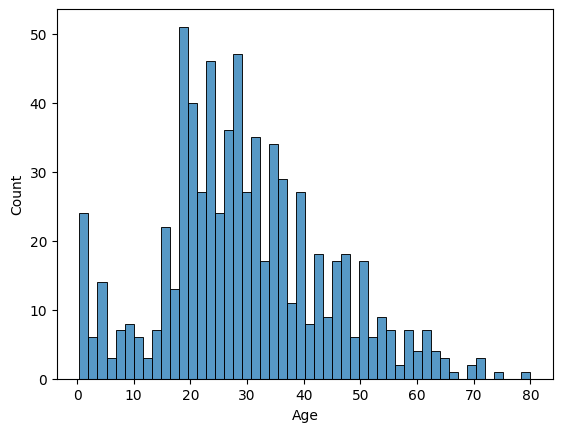

In [48]:
# Plot the histogram of the 'Age' column
sns.histplot(x=df["Age"], bins=50)

<Axes: xlabel='Fare', ylabel='Count'>

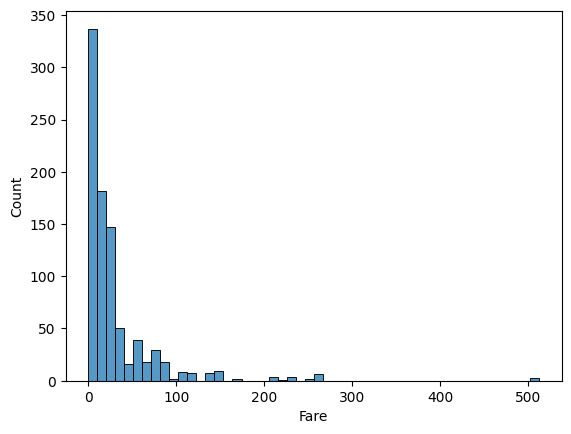

In [50]:
# Plot the histogram of the 'Age' column
sns.histplot(df["Fare"], bins=50)

### **Dist Plot/KDE Plot**
Kernel density plots provide a smooth estimation of the probability density function for a numerical variable, offering insights into the underlying distribution.

Interpreting the Probability Density Function (PDF) of the 'Age' column in the Titanic dataset involves analyzing the smoothed estimate of the likelihood of different age values occurring among the passengers. Here's how you can interpret the PDF of the 'Age' column in the Titanic dataset:

1. **Central Tendency:**
   - Look for the central tendency in the PDF. Peaks in the PDF may indicate modes or clusters of age values that are more prevalent among the passengers.
   - The highest point in the PDF might correspond to the average or median age of the passengers.

2. **Distribution Shape:**
   - Observe the overall shape of the PDF. A symmetric distribution suggests a balanced age distribution, while asymmetry may indicate skewness.
   - Skewness to the right (positive skew) suggests a longer right tail, indicating a higher presence of older passengers. Skewness to the left (negative skew) suggests a higher presence of younger passengers.

3. **Variability and Spread:**
   - Examine the width of the PDF at different points. A wider PDF indicates greater variability or dispersion in age values, while a narrower PDF suggests less variability.

4. **Distinct Age Groups:**
   - Identify if there are distinct peaks or modes in the PDF, which may represent specific age groups.
   - For example, there might be peaks around certain ages corresponding to children, adults, or elderly passengers.

5. **Outliers:**
   - Look for isolated peaks or regions with unusually low probability density, which may indicate the presence of outliers or unique age values.

6. **Comparison with Other Variables:**
   - Compare the 'Age' PDF with other relevant variables (e.g., 'Survived', 'Class', 'Gender') to identify potential relationships or patterns. For instance, you might compare the age distribution between survivors and non-survivors.

7. **Handling Missing Values:**
   - Address any missing values in the 'Age' column, as these may impact the shape and interpretation of the PDF. You can choose to impute missing ages or visualize the distribution excluding missing values.

<Axes: xlabel='Age', ylabel='Density'>

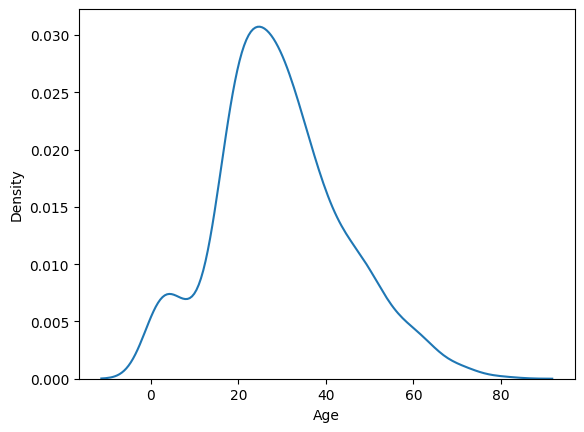

In [53]:
# Plot the PDF of the 'Age' column
sns.kdeplot(data=df["Age"])

<Axes: xlabel='Age', ylabel='Density'>

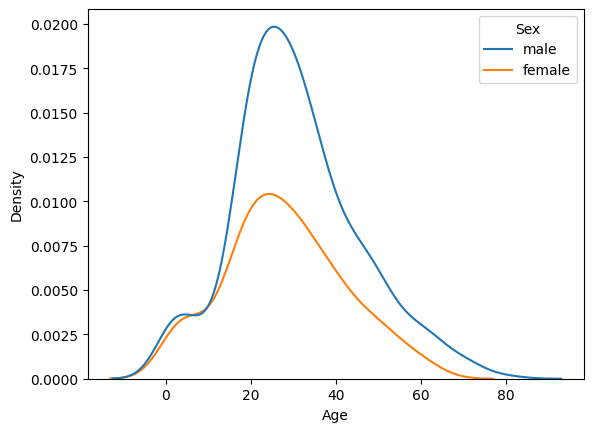

In [64]:
# Plot the PDF of the 'Age' column by the gender
sns.kdeplot(data=df, x="Age", hue="Sex")

<Axes: xlabel='Age', ylabel='Density'>

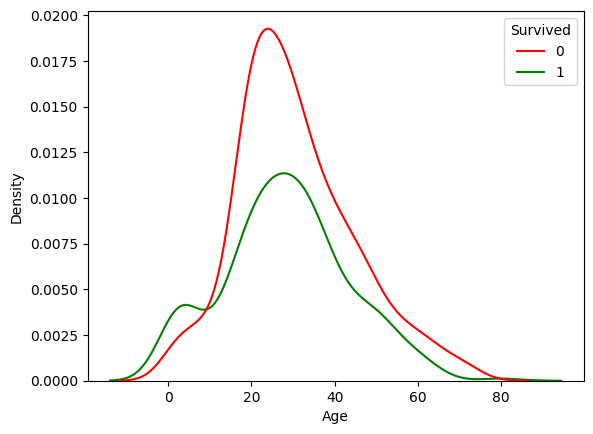

In [74]:
# Compare the 'Age' PDF with 'Survived' to identify potential relationships or patterns
sns.kdeplot(data=df, x="Age", hue="Survived", palette=["red", "green"])

<Axes: xlabel='Fare', ylabel='Density'>

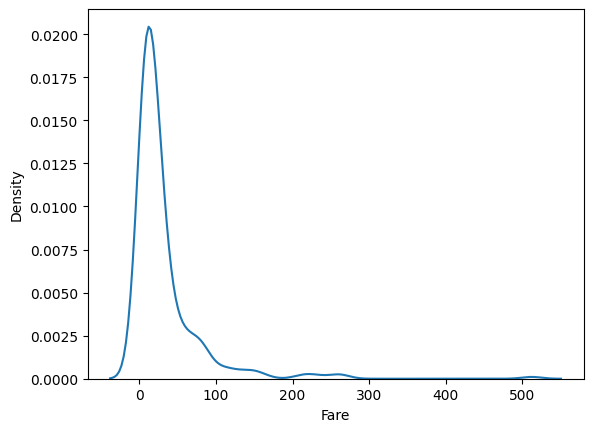

In [62]:
# Plot the PDF of the 'Fare' column
sns.kdeplot(data=df["Fare"])

### **Box Plot**
A boxplot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a visual summary of the central tendency, spread, and potential outliers within the data. Boxplots are particularly useful for comparing the distribution of numerical variables across different groups or categories.

Here are the key components and interpretations of a boxplot:

1. **Box:**
   - The central box represents the interquartile range (IQR), which spans the middle 50% of the data. The box's bottom and top edges denote the first quartile (Q1) and third quartile (Q3), respectively.
   - The width of the box indicates the spread of the middle 50% of the data.

2. **Median (Q2):**
   - A line inside the box represents the median (Q2), which is the middle value when the data is sorted.

3. **Whiskers:**
   - Whiskers extend from the box to the minimum and maximum values within a specified range. The range can be determined by various methods, such as 1.5 times the IQR or extending to the minimum and maximum values within a certain percentage of the data.
   - Outliers beyond the whiskers are often represented as individual points.

4. **Outliers:**
   - Individual data points outside the whiskers are considered potential outliers. These points are plotted individually, providing a clear visual indication of values that significantly deviate from the central tendency.

5. **Symmetry and Skewness:**
   - The symmetry or skewness of the distribution can be inferred by observing the relative lengths of the whiskers and the position of the median.
   - An asymmetric boxplot with a longer tail on one side suggests skewness.

6. **Comparison Across Groups:**
   - Boxplots are particularly useful for comparing the distribution of numerical variables across different categories or groups. Multiple boxes can be displayed side by side for visual comparison.

7. **Seaborn's `boxplot`:**
   - In Python, the Seaborn library provides the `boxplot` function for creating boxplots.
   - This function offers various customization options, including the ability to create grouped or categorical boxplots.

<Axes: xlabel='Age'>

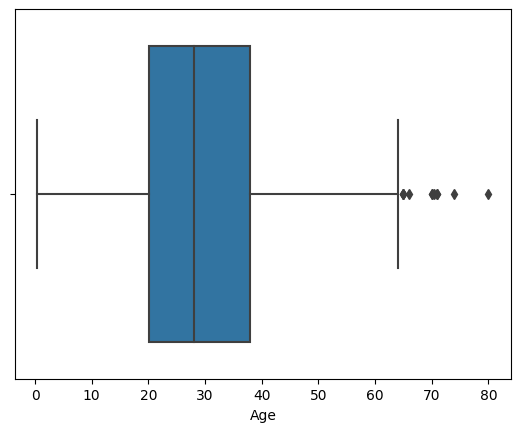

In [81]:
# Plot the box plot of 'Age' column
sns.boxplot(x=df["Age"])

<Axes: xlabel='Fare'>

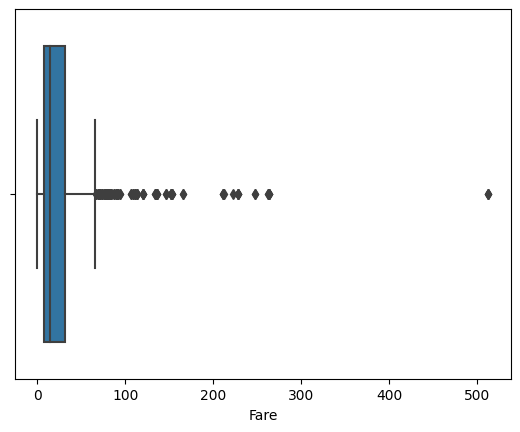

In [82]:
# Plot the 'box' plot of 'Fare' column
sns.boxplot(x=df["Fare"])

## **Descriptive Statistics**

In [83]:
# Check the minimum 'Age'
df["Age"].min()

0.42

In [84]:
# Check the maximum 'Age'
df["Age"].max()

80.0

In [85]:
# Check the mean 'Age'
df["Age"].mean()

29.69911764705882

In [91]:
# Check the skewness of the 'Age' column
df["Age"].skew()

0.38910778230082704

In [93]:
# Check all the descriptive statistics
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64